In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from explore import explore, plot_pixel_array, plot_with_mask
import pydicom
import pandas as pd
from src.dataset import LungDataset, row_to_data



In [27]:
ds = LungDataset("data/train-rle.csv", lazy=True)

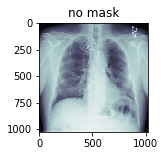

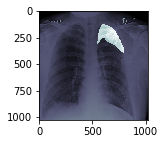

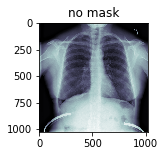

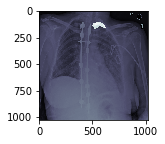

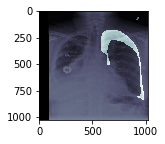

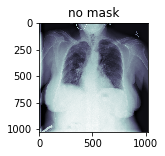

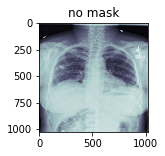

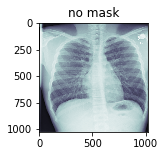

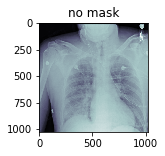

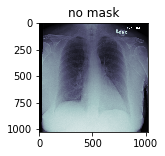

In [42]:
for i in range(10):
    plot_with_mask(*ds[i], (2, 2))
    

In [36]:
data = ds.data
n = len(data)
num_no_mask = sum([x[1] == '-1' for x in data])
print(f"Percentage of images w/o mask: {100*num_no_mask/n}")

Percentage of images w/o mask: 72.39462714219546


In [45]:
mask_only = [row_to_data(x, y) for x, y in data if y != "-1"]